In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

import os

## Compare the runtime

In [2]:
first_file = 'NAMELIST_atm_amip_emission_caroline_month_med_atm'
last_file  = 'atm_amip_emission_caroline_month_med_atm_3d_ml_19790201T000000Z.nc'

In [3]:
dir_fort = '/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_standard/'
dir_cffi = '/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_cffi/'

### Standard (calling fortran)

In [4]:
os.path.join(dir_fort, first_file)

'/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_standard/NAMELIST_atm_amip_emission_caroline_month_med_atm'

In [5]:
os.path.join(dir_fort, last_file)

'/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_standard/atm_amip_emission_caroline_month_med_atm_3d_ml_19790201T000000Z.nc'

In [6]:
!stat /work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_standard/NAMELIST_atm_amip_emission_caroline_month_med_atm

  File: `/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_standard/NAMELIST_atm_amip_emission_caroline_month_med_atm'
  Size: 6538      	Blocks: 16         IO Block: 4194304 regular file
Device: 70806764h/1887463268d	Inode: 144122764414948095  Links: 1
Access: (0644/-rw-r--r--)  Uid: (200155/ k202141)   Gid: (200189/  ka1176)
Access: 2022-04-05 16:11:38.000000000 +0200
Modify: 2022-04-05 16:11:23.000000000 +0200
Change: 2022-04-05 16:11:24.000000000 +0200


In [7]:
!stat /work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_standard/atm_amip_emission_caroline_month_med_atm_3d_ml_19790201T000000Z.nc

  File: `/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_standard/atm_amip_emission_caroline_month_med_atm_3d_ml_19790201T000000Z.nc'
  Size: 691585    	Blocks: 1352       IO Block: 4194304 regular file
Device: 70806764h/1887463268d	Inode: 144122764079405323  Links: 1
Access: (0644/-rw-r--r--)  Uid: (200155/ k202141)   Gid: (200189/  ka1176)
Access: 2022-04-05 17:34:14.000000000 +0200
Modify: 2022-04-05 16:15:26.000000000 +0200
Change: 2022-04-05 16:15:26.000000000 +0200


### Embedded (calling python)

In [8]:
os.path.join(dir_cffi, first_file)

'/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_cffi/NAMELIST_atm_amip_emission_caroline_month_med_atm'

In [9]:
os.path.join(dir_cffi, last_file)

'/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_cffi/atm_amip_emission_caroline_month_med_atm_3d_ml_19790201T000000Z.nc'

In [10]:
!stat /work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_cffi/NAMELIST_atm_amip_emission_caroline_month_med_atm

  File: `/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_cffi/NAMELIST_atm_amip_emission_caroline_month_med_atm'
  Size: 6538      	Blocks: 16         IO Block: 4194304 regular file
Device: 70806764h/1887463268d	Inode: 144122792147688879  Links: 1
Access: (0644/-rw-r--r--)  Uid: (200155/ k202141)   Gid: (200189/  ka1176)
Access: 2022-04-05 20:33:17.000000000 +0200
Modify: 2022-04-05 20:33:02.000000000 +0200
Change: 2022-04-05 20:33:02.000000000 +0200


In [11]:
!stat /work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_cffi/atm_amip_emission_caroline_month_med_atm_3d_ml_19790201T000000Z.nc

  File: `/work/ka1176/caroline/gitlab/icon-aes/experiments/atm_amip_emission_caroline_month_med_cffi/atm_amip_emission_caroline_month_med_atm_3d_ml_19790201T000000Z.nc'
  Size: 691585    	Blocks: 1352       IO Block: 4194304 regular file
Device: 70806764h/1887463268d	Inode: 144122795503127122  Links: 1
Access: (0644/-rw-r--r--)  Uid: (200155/ k202141)   Gid: (200189/  ka1176)
Access: 2022-04-05 20:37:09.000000000 +0200
Modify: 2022-04-05 20:37:10.000000000 +0200
Change: 2022-04-05 20:37:10.000000000 +0200


### Comparison

#### Extract the pure Fortran runtime

The Fortran run created its first file at 

> 2022-04-05 16:11:23.000000000 +0200

and the last file at 

> 2022-04-05 16:15:26.000000000 +0200

The difference is

> 4 min 3 sec

#### Extract the embedded Python runtime

The embedded python run created its first file at 

> 2022-04-05 17:03:49.000000000 +0200

and the last file at 

> 2022-04-05 17:07:51.000000000 +0200

The difference is

> 4 min 2 sec

#### Conclusion

Both one-month runs took the same time to complete, indicating no significant overhead for a quick Python calculation that is executed in embedded code. Execution time remains dominated by other components, mainly File I/O. Reading from the log files, we can try to estimate the time that is passing between the log steps, that are executed every 72nd model step in our scenario.



In [55]:
t1_fort = 161203.381
t2_fort = 161211.562
steps = 72

t1_cffi = 203341.647
t2_cffi = 203349.803

print('Time per model step (Fortran)', (t2_fort - t1_fort) / steps)
print('Time per model step (CFFI)   ', (t2_cffi - t1_cffi) / steps)

Time per model step (Fortran) 0.11362500000015846
Time per model step (CFFI)    0.11327777777801708


## Compare the results

In [12]:
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature

In [13]:
from cdo import *

cdo = Cdo()

In [14]:
tempPath = './tmp/'
cdo = Cdo(tempdir=tempPath)

In [39]:
day = 31

In [40]:
infile_fort  = os.path.join(dir_fort, f'atm_amip_emission_caroline_month_med_atm_3d_ml_197901{day:02d}T000000Z.nc')
outfile_fort = f'./remapped/remap_fort_{day:02d}.nc'

infile_cffi  = os.path.join(dir_cffi, f'atm_amip_emission_caroline_month_med_atm_3d_ml_197901{day:02d}T000000Z.nc')
outfile_cffi = f'./remapped/remap_cffi_{day:02d}.nc'

In [41]:
cdo.remapcon('t63grid', input='-seltimestep,1 -selvar,ttr ' + infile_fort, output=outfile_fort)
cdo.remapcon('t63grid', input='-seltimestep,1 -selvar,ttr ' + infile_cffi, output=outfile_cffi)

'./remapped/remap_cffi_31.nc'

In [42]:
remapped_fort = xr.open_dataset(outfile_fort)
remapped_fort.close()

remapped_cffi = xr.open_dataset(outfile_cffi)
remapped_cffi.close()

In [43]:
remapped_fort

<xarray.Dataset>
Dimensions:      (time: 1, lon: 192, lat: 96, bnds: 2, height: 47)
Coordinates:
  * time         (time) float64 1.979e+07
  * lon          (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat          (lat) float64 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
  * height       (height) float64 1.0 2.0 3.0 4.0 5.0 ... 44.0 45.0 46.0 47.0
Dimensions without coordinates: bnds
Data variables:
    lat_bnds     (lat, bnds) float64 ...
    height_bnds  (height, bnds) float64 ...
    ttr          (time, height, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    uuidOfVGrid:  77af4ca7-2d71-079d-1f8e-3e1c5c9f29c0
    source:       git@gitlab.dkrz.de:k202141/icon-aes-fork.git@c1750c2ed05fd2...
    institution:  Max Planck Institute for Meteorology
    title:        ICON simulation
    history:      Tue Apr 05 20:44:11 2022: cdo -O -remapcon,t63grid -seltime...
    references:   see MPIM/DWD publications
    comment:      Caroline Arnold (k202141) on m11357 (Linux 2.6.32-754.41.2....
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [44]:
ttr_2D_fort = np.sum(remapped_fort.ttr.values.squeeze(), axis=0)
ttr_2D_cffi = np.sum(remapped_cffi.ttr.values.squeeze(), axis=0)

In [45]:
from cartopy.util import add_cyclic_point

data_wrap_fort, lon_wrap_fort = add_cyclic_point(remapped_fort.ttr[0], coord=remapped_fort.lon, axis=2)

data_wrap_fort = np.sum(data_wrap_fort, axis=0)

data_wrap_cffi, lon_wrap_cffi = add_cyclic_point(remapped_cffi.ttr[0], coord=remapped_cffi.lon, axis=2)

data_wrap_cffi = np.sum(data_wrap_cffi, axis=0)

data_wrap_diff, lon_wrap_diff = add_cyclic_point(remapped_fort.ttr[0] - remapped_cffi.ttr[0], coord=remapped_cffi.lon, axis=2)

data_wrap_diff = np.sum(data_wrap_diff, axis=0)

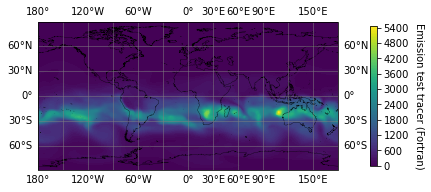

In [56]:
fig, ax = plt.subplots(figsize=(7, 7*2/3))

ax = plt.axes(projection=ccrs.PlateCarree())

plt_cn = ax.contourf(lon_wrap_cffi, remapped_cffi.lat, data_wrap_cffi, transform=ccrs.PlateCarree(), levels=100)

ax.coastlines(resolution='50m', linewidth=0.3, color='black')

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', xlocs=range(-180,180,30), ylocs=range(-90,90,30))

cbar = plt.colorbar(plt_cn, pad=0.08, shrink=0.55)
cbar.set_label('Emission test tracer (Fortran)', labelpad=15, y=.5, rotation=270)

plt.savefig(f'./plots/emission_ttr_fort_day_{day:02d}.png', bbox_inches='tight')

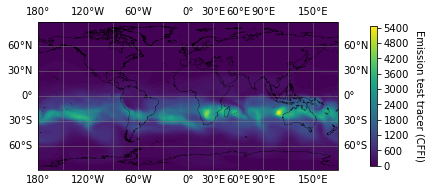

In [57]:
fig, ax = plt.subplots(figsize=(7, 7*2/3))

ax = plt.axes(projection=ccrs.PlateCarree())

plt_cn = ax.contourf(lon_wrap_fort, remapped_fort.lat, data_wrap_fort, transform=ccrs.PlateCarree(), levels=100)

ax.coastlines(resolution='50m', linewidth=0.3, color='black')

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', xlocs=range(-180,180,30), ylocs=range(-90,90,30))

cbar = plt.colorbar(plt_cn, pad=0.08, shrink=0.55)
cbar.set_label('Emission test tracer (CFFI)', labelpad=15, y=.5, rotation=270)

plt.savefig(f'./plots/emission_ttr_cffi_day_{day:02d}.png', bbox_inches='tight')

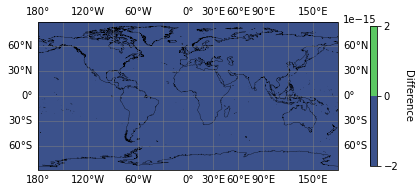

In [58]:
fig, ax = plt.subplots(figsize=(7, 7*2/3))

ax = plt.axes(projection=ccrs.PlateCarree())

plt_cn = ax.contourf(lon_wrap_fort, remapped_fort.lat, data_wrap_diff, transform=ccrs.PlateCarree(), levels=100)

ax.coastlines(resolution='50m', linewidth=0.3, color='black')

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', xlocs=range(-180,180,30), ylocs=range(-90,90,30))

cbar = plt.colorbar(plt_cn, pad=0.08, shrink=0.55)
cbar.set_label('Difference', labelpad=15, y=.5, rotation=270)

plt.savefig(f'./plots/emission_ttr_diff_day_{day:02d}.png', bbox_inches='tight')

In [49]:
for i in range(47):
    assert np.allclose(remapped_fort.ttr[0,i], remapped_cffi.ttr[0,i]), print(i)